# Homework 17 - Second order ODEs 

In [2]:
import numpy as np
import scipy.integrate as spi
import scipy.stats as sps
import matplotlib.pyplot as plt

plt.style.use("seaborn")

# Excercise 1
The harmonic oscillator arises in many phyiscal problems.

1. Solve the harmonic oscillator problem,
$$\ddot{x}=-\omega^2x,$$

2. ...and solve the <a href="https://en.wikipedia.org/wiki/Anharmonicity">anharmonic oscillator</a> problem,
$$\ddot{x}=-\omega^2x^3,$$

3. ...and also solve the <a href="https://en.wikipedia.org/wiki/Van_der_Pol_oscillator">van der Pol oscillator</a> problem for $\mu=5$,
$$\ddot{x}-\mu(1-x^2)\dot{x}+\omega^2x=0.$$

4. For all cases, solve the ODE from $t=0\rightarrow50$, with equally spaced steps and $N=10,000$.  Use the initaial conditions $x_0=1$ and $\dot{x}_0=0$, and let $\omega=1$.

5. For all cases, only plot $x$ versus $\dot{x}$, ie. position versus velocity, which is known as a phase space plot. Use a square shaped figure such as `plot.figure(figsize=(8,8))`

# <font color="blue">Answer:</font>


In [3]:
def f1(t, r, *args):
    omega, = args
    y, x = r
    fy = -omega**2 * x
    fx = y
    return np.array([fy, fx])

def f2(t, r, *args):
    omega, = args
    y, x = r
    fy = -omega**2 * x**3
    fx = y
    return np.array([fy, fx])

def f3(t, r, *args):
    omega, mu = args
    y, x = r
    fy = mu * (1 - x**2) * y - omega**2 * x
    fx = y
    return np.array([fy, fx])

def solve_and_plot(f: callable, x0, *params) -> None:
    t0 = 0
    t1 = 50
    N = 10000
    t = np.linspace(t0, t1, N)

    solver = spi.solve_ivp(
        fun=f,
        t_span=[t0, t1],
        y0=x0,
        t_eval=t,
        args=params
    )
    print(solver.message)

    plt.figure(figsize=(9, 9))
    plt.plot(solver.y[1], solver.y[0], markersize=2)
    plt.xlabel(r"Position ($x$)", fontsize=20)
    plt.ylabel(r"Velocity ($\dot{x}$)", fontsize=20)
    plt.show()
    plt.close()


The solver successfully reached the end of the integration interval.


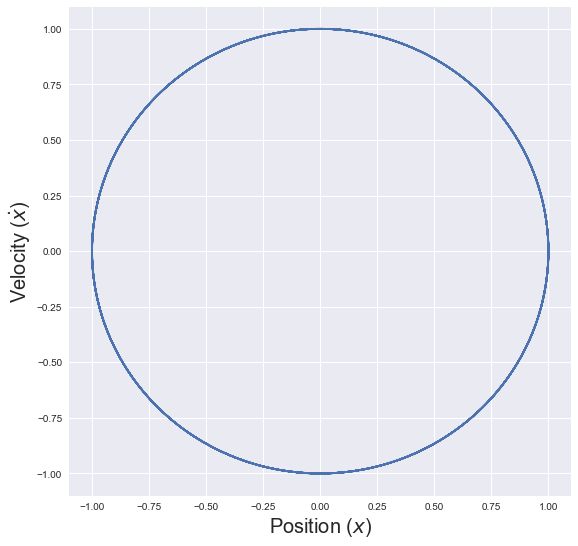

The solver successfully reached the end of the integration interval.


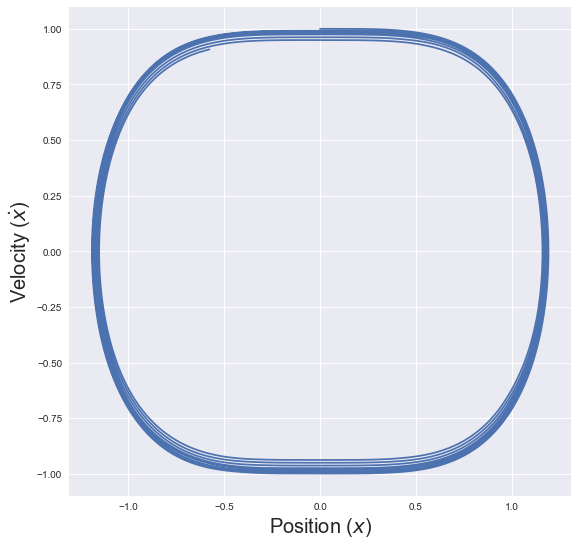

The solver successfully reached the end of the integration interval.


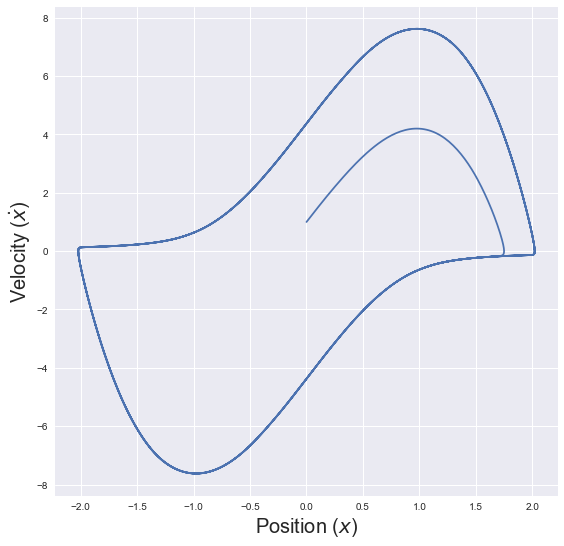

In [4]:
w = 1
mu = 5
x0 = (1, 0)
solve_and_plot(f1, x0, w)
solve_and_plot(f2, x0, w)
solve_and_plot(f3, x0, w, mu)

# <font color="blue">Answer:</font>


# Excercise 2

Comets travel in <a href="https://en.wikipedia.org/wiki/Comet#Orbital_characteristics">elongated orbits</a> around the sun, but the gravitational law is the same for comets as it is for planets. Assuming an orbit in a 2 dimensional plane, the equation of motion for the comet is
$$m\mathbf{\ddot{r}}=-\left(\frac{GMm}{r^2}\right)\frac{\mathbf{r}}{r}$$
where $\mathbf{r}=(x,y)$ and $r=\sqrt{x^2+y^2}$, and assuming there's nothing else in the solar system but the sun.

You are going to solve the resulting four first order equations for the orbit of a comet. The mass of the sun us $M=1.989\times10^{30}$ kg, and $G=6.674\times10^{-11}$ m<sup>3</sup>/kg/s<sup>2</sup>. Plot the orbit $x$ vs $y$.  As the initial condition, take the <a href="https://en.wikipedia.org/wiki/Apsis">aphelion</a> distance to be $4\times10^9$ km (around Neptune's orbit), and orient $x$ and $y$ such that this value is $x_0$ and $y_0=0$. Then the tangential velocity of the coment is $v_x=0$ and $v_y=500$ m/s.

- First, solve using fixed time steps. Simulate about 95 years in 1000 steps using `scipy.integrate.solve_ivp` and pass your time points array using the `t_eval` option. (Watch your units! All of your units should be in standard meters, kg, seconds.)

- Give a short description of your findings. What do you observe about the orbit? It will be helpful to plot the orbit with *dots and lines* so you can see where each time point falls.

- Next, solve let `scipy.integrate.solve_ivp` choose the time points. Simulate the same 95 years but ask for a relative and absolute accuracy of about 1,000 km at the aphelion, ie. `rtol` and `atol` should be `1E-6`.

- How has the orbit changed? Is the calculation stable, which means that becuase the equations are periodic, do successive orbits lie on top of each other?

The solver successfully reached the end of the integration interval.


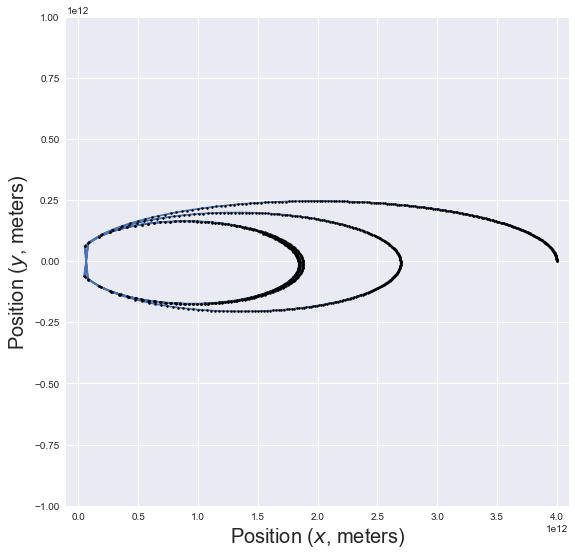

In [16]:
x0 = (4e12, 0, 0, 500)

def f(t, r):
    G = 6.67408e-11
    M = 1.989e30
    x, vx, y, vy = r
    fvx = -G * M * x/ (x**2 + y**2)**(3/2)
    fx = vx
    fvy = -G * M * y/ (x**2 + y**2)**(3/2)
    fy = vy
    return np.array([fx, fvx, fy, fvy])

t0 = 0
t1 = 95 * 365 * 24 * 3600
N = 1000
t = np.linspace(t0, t1, N)

solver = spi.solve_ivp(
    fun=f,
    t_span=[t0, t1],
    y0=x0,
    t_eval=t
)
print(solver.message)

fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(solver.y[0], solver.y[2], markersize=2)
ax.plot(solver.y[0], solver.y[2], "k.", markersize=5)
ax.set_xlabel(r"Position ($x$, meters)", fontsize=20)
ax.set_ylabel(r"Position ($y$, meters)", fontsize=20)
ax.set(xlim=(-1e11, 4e12 + 1e11), ylim=(-1e12, 1e12))
plt.show()
plt.close()

## Discussion

If we supply our own time points, then the orbit / solution to the differential equation is not stable.

### Why?

This happens due to the fact that we are using equal step sizes, and when the slope of the function near the perihelion begins to increase, we start moving too far in each step. This is why we should instead specify `rtol` and `atol` when using the RK methods, in place of manually supplying fixed time steps.

The solver successfully reached the end of the integration interval.


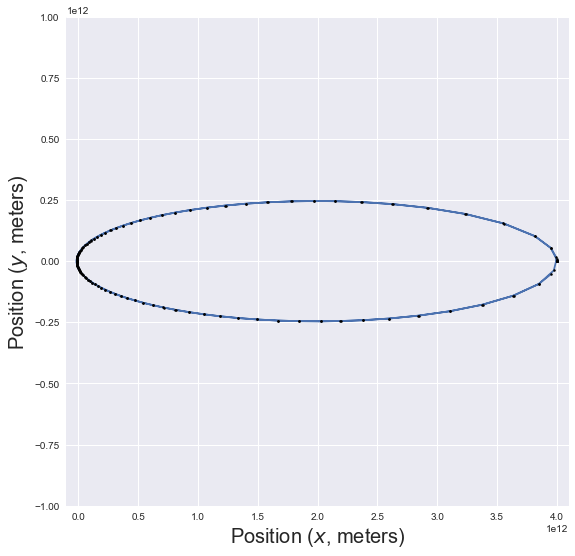

In [15]:
x0 = (4e12, 0, 0, 500)

def f(t, r):
    G = 6.67408e-11
    M = 1.989e30
    x, vx, y, vy = r
    fvx = -G * M * x/ (x**2 + y**2)**(3/2)
    fx = vx
    fvy = -G * M * y/ (x**2 + y**2)**(3/2)
    fy = vy
    return np.array([fx, fvx, fy, fvy])

t0 = 0
t1 = 95 * 365 * 24 * 3600
N = 1000
t = np.linspace(t0, t1, N)

solver = spi.solve_ivp(
    fun=f,
    t_span=[t0, t1],
    y0=x0,
    rtol=1e-6,
    atol=1e-6
)
print(solver.message)

fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(solver.y[0], solver.y[2], markersize=2)
ax.plot(solver.y[0], solver.y[2], "k.", markersize=5)
ax.set_xlabel(r"Position ($x$, meters)", fontsize=20)
ax.set_ylabel(r"Position ($y$, meters)", fontsize=20)
ax.set(xlim=(-1e11, 4e12 + 1e11), ylim=(-1e12, 1e12))
plt.show()
plt.close()

## Discussion

If we let `scipy.integrate.solve_ivp` choose the time step, then the orbit / solution to the differential equation is stable.

### Why?

When letting SciPy choose the time points together with specified tolerances, we avoid the issue of taking steps of the wrong size when the slope is large. Additionally, when the object is far from the sun, we take fewer steps to avoid uneeded calculation.

# Excercise 3
Atoms $i$ and $j$ are both elemental argon. Being noble gases, they cannot form a covalent bond. But quanutm mechanics says they do interact with each other. We can use the Lennard-Jones potential, a mathematically simple model that approximates the interaction between a pair of neutral atoms:
$$ V(x_{ij})=\frac{a_{ij}}{x_{ij}^{12}}-\frac{b_{ij}}{x_{ij}^{6}}$$
For two argon atoms, typical vaues would be $a=2.266\times10^{-6}$ kcal nm<sup>12</sup>/mol, and $b=1.467\times10^{-3}$  kcal nm<sup>6</sup>/mol

- Make a properly labeled plot for this potential, showing clearly the region where $V(x_{ij})$ drops below 0. I suggest plotting the energy in units of J/mol, and the range of $x$ from 0.32 to 1 nm.
  
The motion of one atom, trapped in the potential well of the LJ potential is given by the equations of motion 
$$m\ddot{x} = -\frac{\partial V}{\partial x}.$$

- **Use the Verlet method** to solve for the motion of the argon atoms from $t=0\rightarrow 10\times10^{-12}$ seconds (10 picoseconds) in $N=1000$ steps. Let the inital value of the position to be $x_0=0.4$ nm, and the inital velocity be $v_0=0.01$ nm/sec. The mass of argon is 39.948 g/mol. In fact, if you use standard units except for distance in nm, it should work out perfectly.

- Plot the kinetic, potential, and total energy and determine the total energy drift.

# <font color="blue">Answer:</font>


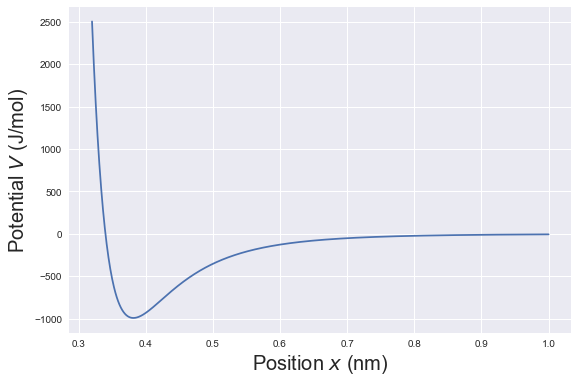

In [7]:
def V(x):
    a = 4184 * 2.266e-6
    b = 4184 * 1.467e-3
    return a*x**(-12) - b*x**(-6)


def pVpx(x):
    a = 4184 * 2.266e-6
    b = 4184 * 1.467e-3
    return -12 * a * x**(-13) + 6 * b * x**(-7)


x = np.linspace(0.32, 1, 1000)

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(x, V(x))
ax.set_xlabel(r"Position $x$ (nm)", fontsize=20)
ax.set_ylabel(r"Potential $V$ (J/mol)", fontsize=20)
plt.show()
plt.close()


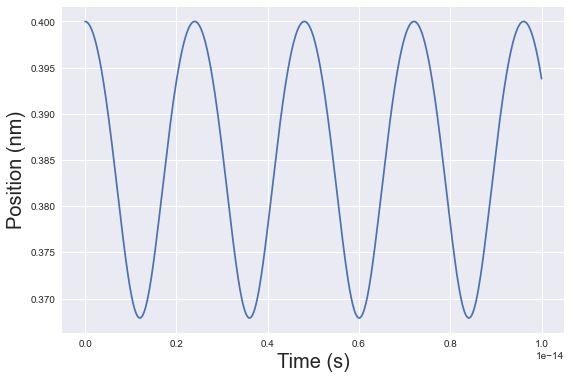

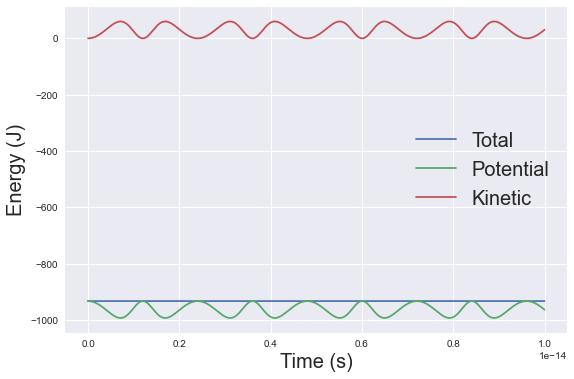

LinregressResult(slope=64323446082.44044, intercept=-933.4131960244844, rvalue=0.04561389731851865, pvalue=0.1494761535199504, stderr=44591756406.09027, intercept_stderr=0.00025751504467100945)


In [8]:
m = (39.948 / 1000) / 6.02214e23

def accel(x):
    return -(1/m) * pVpx(x)

t0 = 0
t1 = 1e-14
N = 1000
t, dt = np.linspace(t0, t1, N, retstep=True)
x0 = (0.4, 0.01)

x = np.zeros(N, dtype=float)
x[0] = x0[0]
v = np.zeros(N, dtype=float)
v[0] = x0[1]

for i in range(N-1):
    v_ht = v[i] + 0.5 * dt * accel(x[i])
    x[i + 1] = x[i] + v_ht * dt
    v[i + 1] = v_ht + 0.5 * dt * accel(x[i+1])

ke = 0.5 * m * v**2
pe = V(x)

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(t, x)
ax.set_xlabel(r"Time (s)", fontsize=20)
ax.set_ylabel(r"Position (nm)", fontsize=20)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(t, ke + pe, label="Total")
ax.plot(t, pe, label="Potential")
ax.plot(t, ke, label="Kinetic")
ax.set_xlabel("Time (s)",fontsize=20)
ax.set_ylabel("Energy (J)",fontsize=20)
ax.legend(fontsize=20)
plt.show()
plt.close()

print(sps.linregress(t, ke + pe))

In [ ]:
# Test code using scipy.integrate.solve_ivp

# def f(t, r):
#     x, xx = r
#     fxx = -(1/m) * pVpx(x)
#     fx = xx
#     return np.array([fx, fxx])

# solver = spi.solve_ivp(
#     fun=f,
#     t_span=[t0, t1],
#     y0=x0,
#     rtol=1e-10,
#     atol=1e-10
# )

# ke = 0.5 * m * solver.y[1]**2
# pe = V(solver.y[0])

# print(solver.message)

# fig, ax = plt.subplots(figsize=(9, 6))
# ax.plot(solver.t, solver.y[0])
# ax.set_xlabel(r"Time (s)", fontsize=20)
# ax.set_ylabel(r"Position (nm)", fontsize=20)
# plt.show()
# plt.close()

# fig, ax = plt.subplots(figsize=(9, 6))
# ax.plot(solver.t, ke + pe, label="Total")
# ax.plot(solver.t, pe, label="Potential")
# ax.plot(solver.t, ke, label="Kinetic")
# ax.set_xlabel("Time (s)",fontsize=20)
# ax.set_ylabel("Energy (J)",fontsize=20)
# ax.legend(fontsize=20)
# plt.show()
# plt.close()

## Discussion

We see that there is a large amount of energy creep in the solution, although this is not entirely noticeable in the plot since we are plotting over such a small time scale. Note this energy creep is why I had to plot from $t=0$ to $t=0.01$ picoseconds instead of $t=10$ picoseconds. (Not only the energy creep, but the frequency was way too high to show that long of a period, the plot was just a solid colour.)